import library

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
A=np.identity(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


use pandas to read and get data

In [250]:
data=pd.read_csv('ex1data1.txt', header=None,names=['Population','Profit'])
X=data.Population
Y=data.Profit
N=len(X)


show scatter figure to observe simply

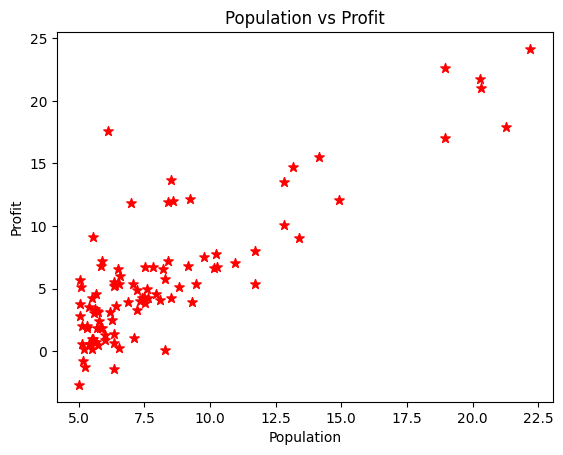

In [251]:
plt.scatter(X,Y,c='r',marker='*',s=50)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')
plt.show()

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [ ]:
def compute_cost(X,Y,theta):
     Prediction=np.dot(X,theta)
     error=Prediction-Y
     return np.sum(error**2)/(2*len(Y))#particularly important to look at the dimentions of the arrays 


In [253]:
data.insert(0,'ones',1)#all are 1,so that we can conveniently multiply with theta
# x=np.array(X)
# y=np.array(Y)
print(N)

97


In [ ]:
data.head()#shows the first 5 rows

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [ ]:
x=data.iloc[:,[0,1]]
y=data.iloc[:,[2]]#pay attention to the[2],not just 2

In [256]:
x.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [257]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [ ]:
x=np.array(x)#pandas uses series,not array
y=np.array(y)

In [ ]:
theta=np.zeros((2,1))#initial parameters
print(theta)

[[0.]
 [0.]]


In [260]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [261]:
compute_cost(x,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [ ]:
def GradientDecent(X,Y,theta,alpha,iterations):
  J_history=[]
  for i in range(iterations):
        Gradient=np.dot(X.T,(np.dot(X,theta)-Y))/N#remember dimentions likewise
        theta=theta-alpha*Gradient
        J_history.append(compute_cost(X,Y,theta))
  return theta,J_history

In [268]:
para,cos=GradientDecent(x,y,theta,0.01,1000)
para,cos
len(cos)

1000

subfigure

-3.2414021442744225 1.1272942024281842


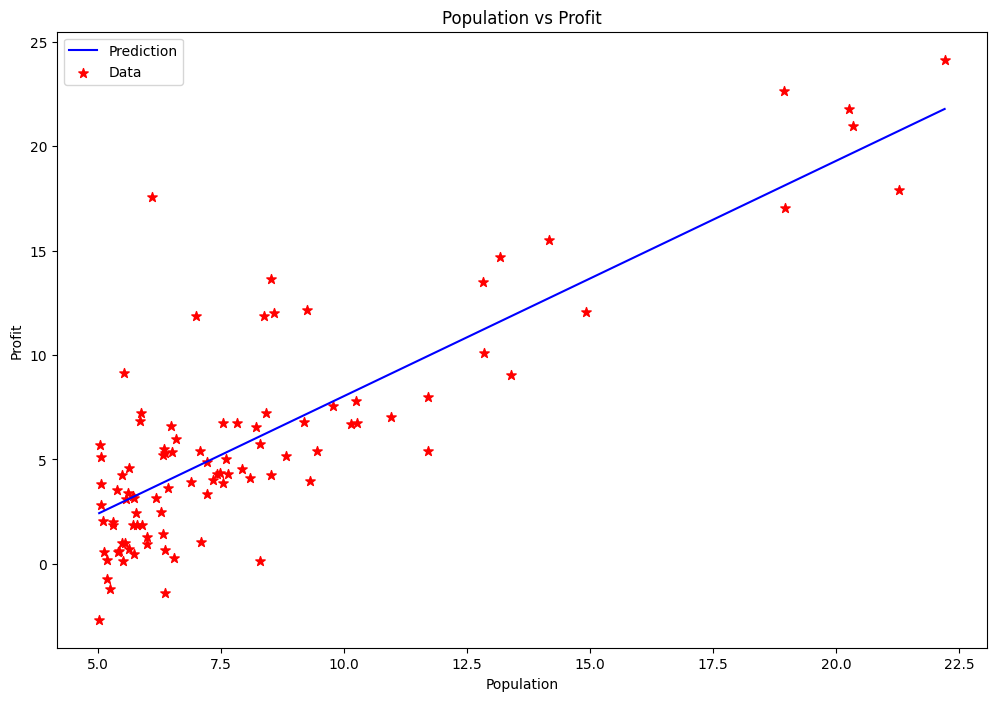

In [ ]:
h=para[0,0]+ para[1,0]*X1
print(para[0,0], para[1,0])
X1=np.linspace(data.Population.min(), data.Population.max(), 100)
fig,ax=plt.subplots(figsize=(12,8))#fig is the whole figure,ax is sub figure
ax.plot(X1,h,c='b',label='Prediction')
ax.scatter(X,Y,c='r',marker='*',s=50,label='Data')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Population vs Profit')
ax.legend()
plt.show()

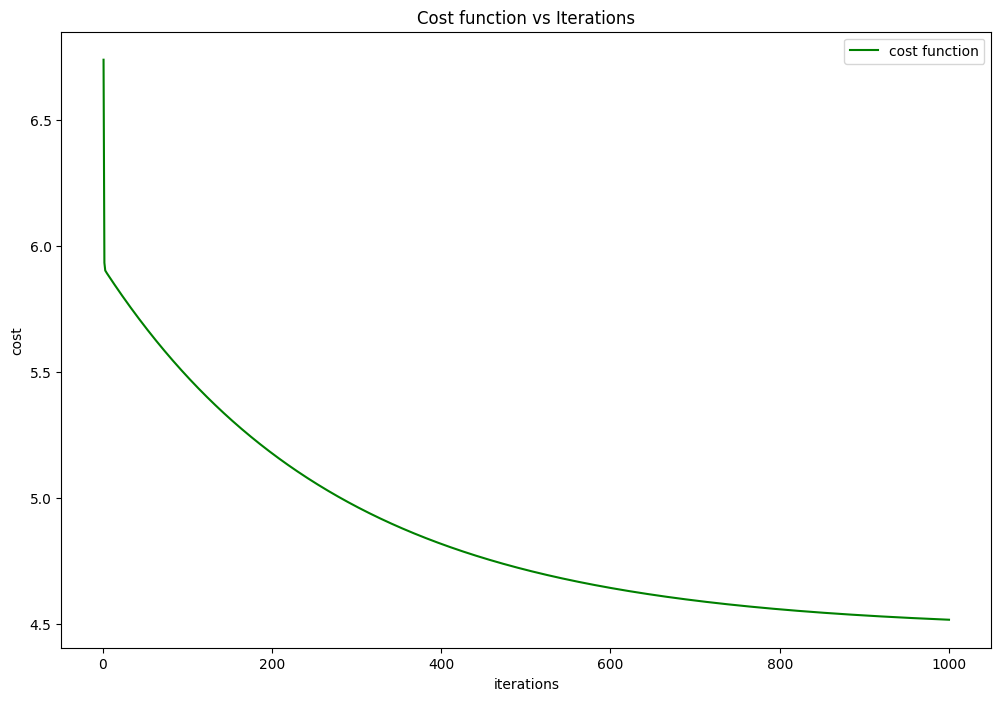

In [269]:
fig,ax=plt.subplots(figsize=(12,8))  
ax.plot(range(1,1001),cos,c='g',label='cost function')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('Cost function vs Iterations')
ax.legend()
plt.show()